In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model_prediction import Replicator
from pneumococcus_data import data_observation
from subsystem import alpha_extract
from compute_dynamics import *

Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()
big_alpha_Jan = np.loadtxt(open("big_alpha_Jan.txt","rb"), delimiter = ",", skiprows = 0)
big_alpha_May = np.loadtxt(open("big_alpha_May.txt","rb"), delimiter = ",", skiprows = 0)

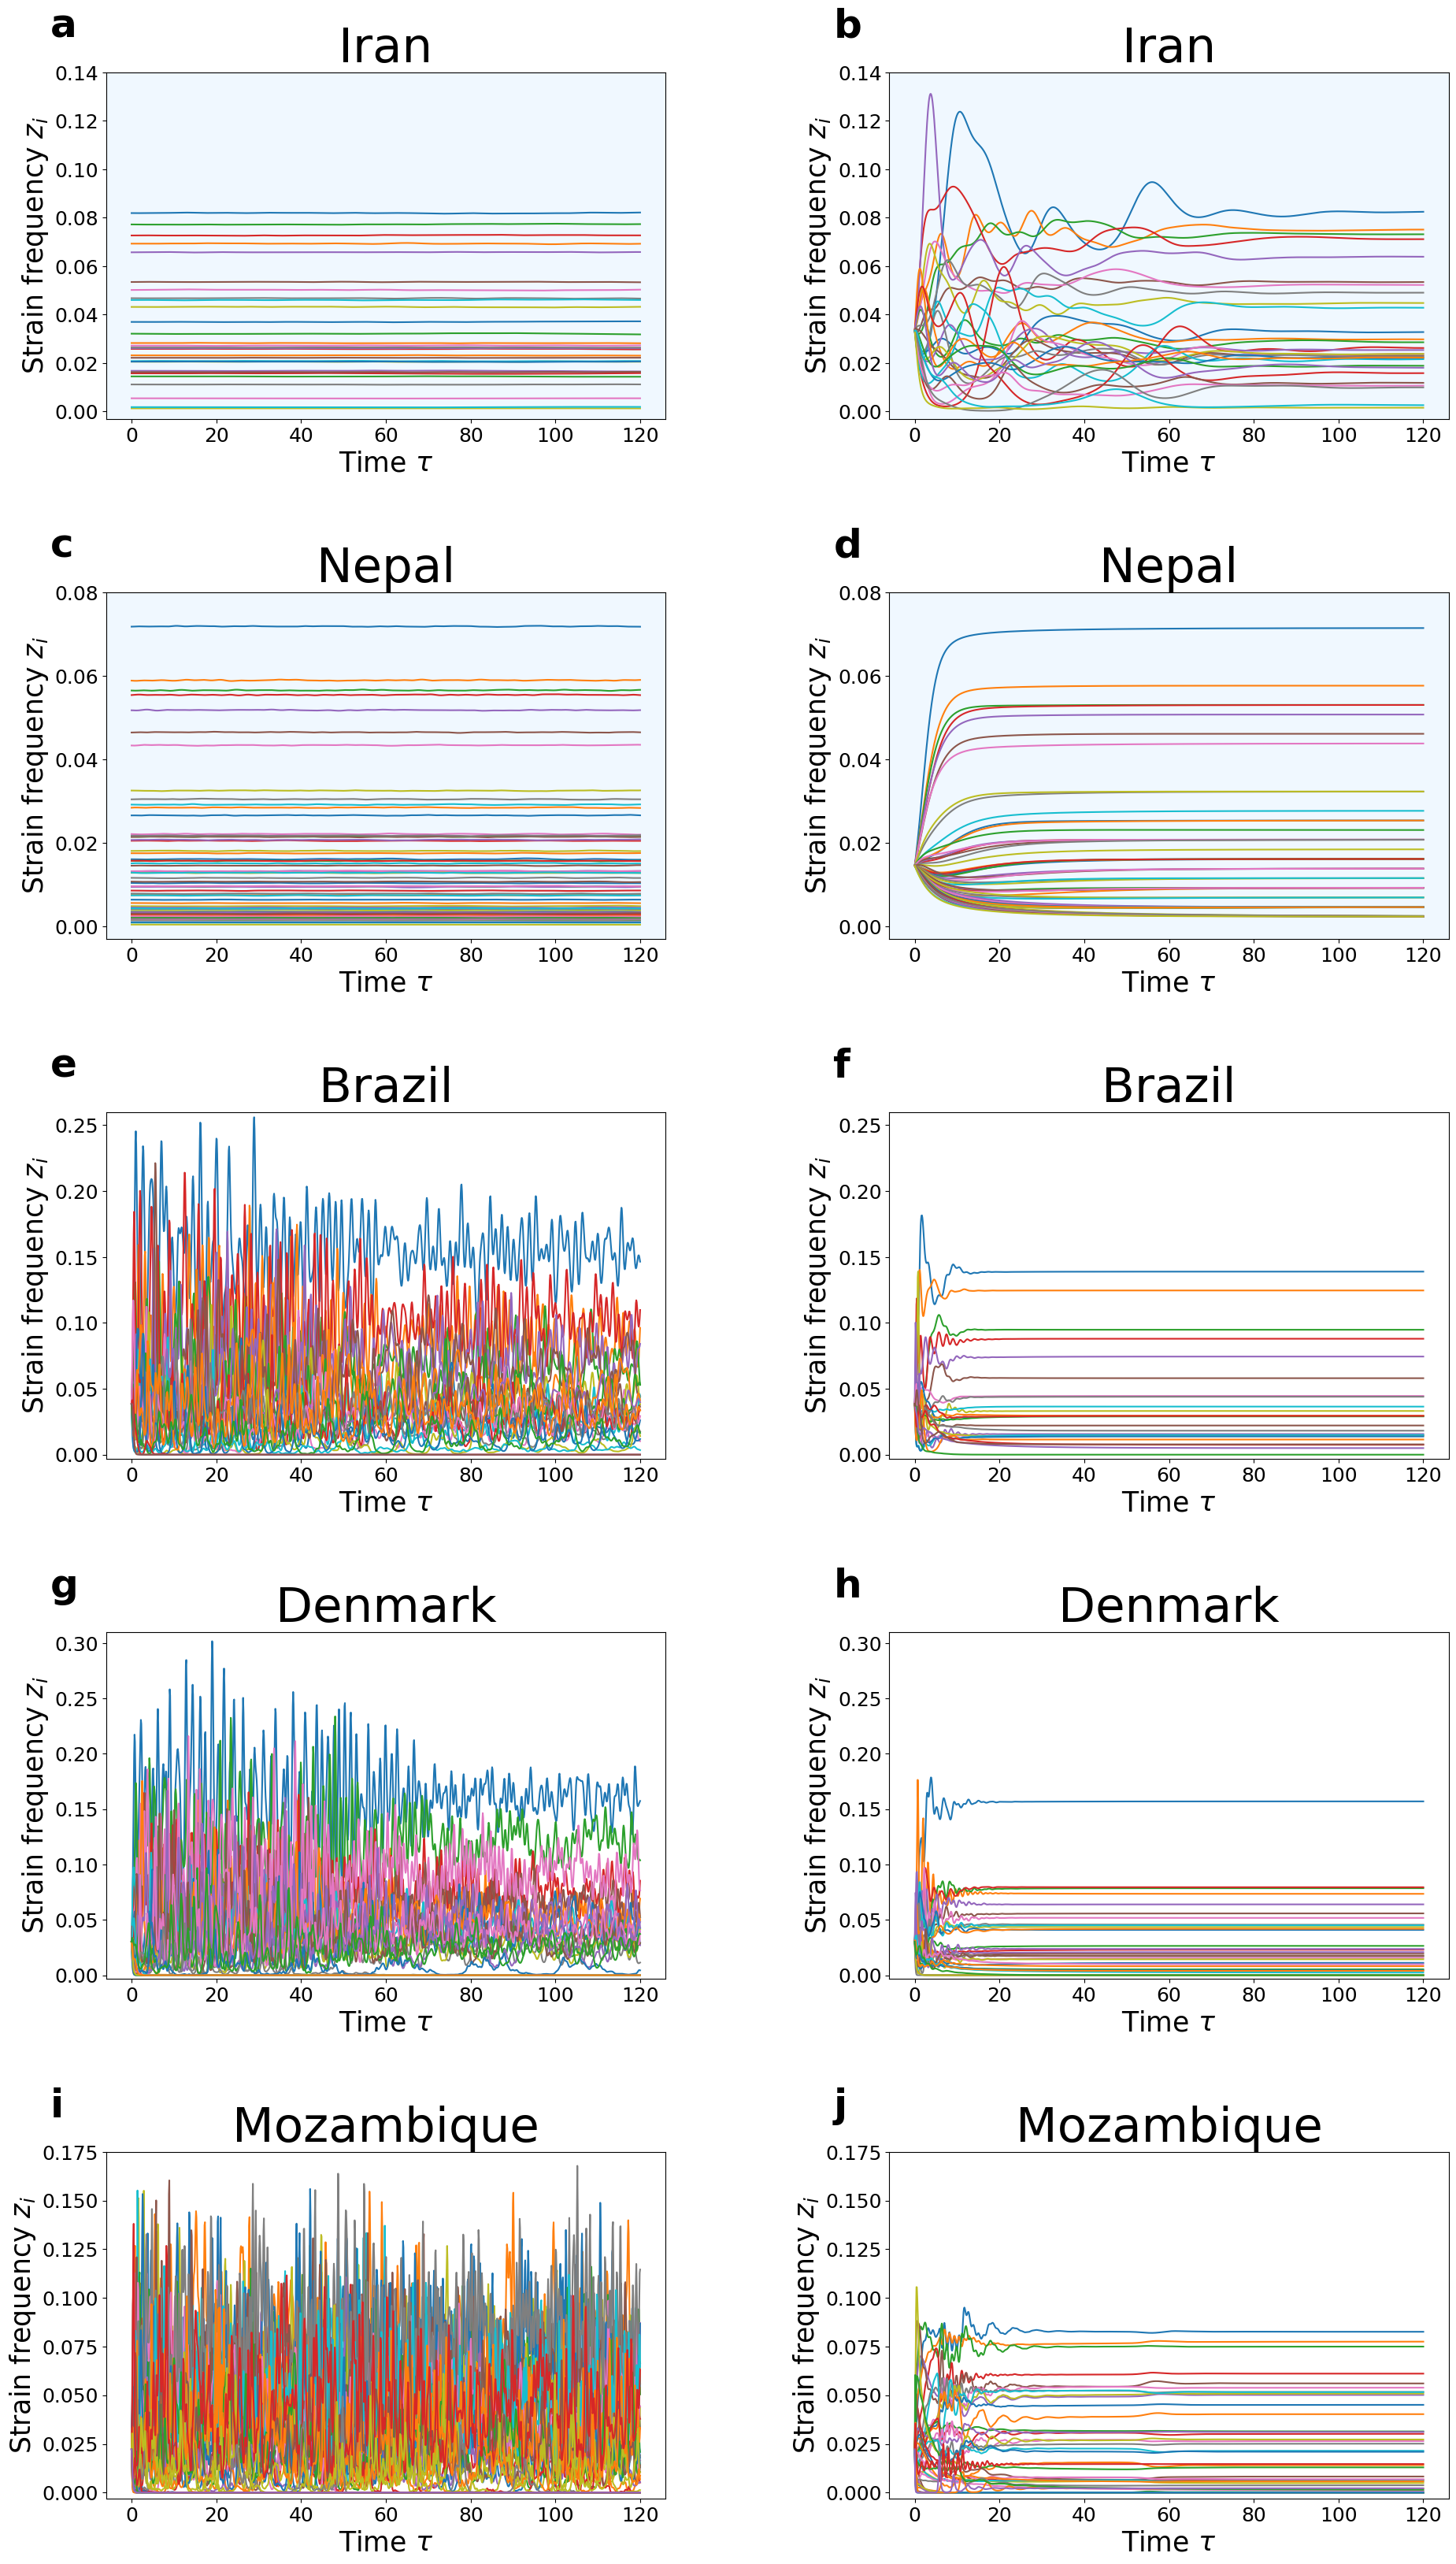

In [2]:
#compute solution of predicted model (replicator dynamics)
big_alpha = [big_alpha_Jan, big_alpha_May]
country = [Iran, Nepal, Brazil, Denmark, Mozambique]

mu_list = [0.93, 3.95, 9.85, 10.23, 16.8]

name_country = np.array(['Iran', 'Nepal', 'Brazil', 'Denmark', 'Mozambique'])
label = np.array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j'])
label = label.reshape(5, 2)

yaxis = np.array([.14, .08, .26, .31, .175])

fig, ax = plt.subplots(5, 2, figsize = (22, 40))
plt.subplots_adjust(hspace = 0.5, wspace = 0.4)

for i in range (0, 5):
    #extract data for each country
    strain_list = np.array(country[i].strain)
    strain_number = len(strain_list)
    
    for j in range (0, 2):
        #extract alpha matrix from big alpha
        alpha_matrix = alpha_extract(strain_list, big_alpha[j])
        if (i == 0 or i == 1) and j==0:
            lambd = fitness(alpha_matrix, mu_list[i])
            one = np.ones(strain_number) #vector of all ones
            inv = np.linalg.inv(lambd) #inverse matrix of fitness matrix
            u0 = (1/np.matmul(one.T, np.matmul(inv, one)))*np.matmul(inv, one)
            u0 = u0 + np.random.rand(strain_number)*0.00005
            u0 = u0/sum(u0)
        else:
            #initial value
            u0 = (1/strain_number)*np.ones(strain_number)
    
        result, ax[i,j] = plot_dynamics(T = 120, mu = mu_list[i], A = alpha_matrix, z0 = u0, ax = ax[i,j])
        
        ax[i,j].set_ylim([-0.003, yaxis[i]])
        ax[i,j].tick_params(axis='both', which='major', labelsize = 18)
        
        ax[i,j].set_title(f'{name_country[i]}', fontsize = 44)
        ax[i,j].text(-.1, 1.1, '{}'.format(label[i,j]), transform=ax[i,j].transAxes, size = 36, weight='bold')
        
for i in range (0, 2):
    for j in range (0, 2):
        ax[i,j].set_facecolor('aliceblue')